In [247]:
# Python info
import sys
print("Python: {}". format(sys.version))

Python: 3.6.4 |Anaconda, Inc.| (default, Mar 13 2018, 01:15:57) 
[GCC 7.2.0]


In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [250]:
# Warnings suspention
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

-------------------------


In [251]:
# Url to train.csv on my GitHub
url = "https://raw.githubusercontent.com/QuarKUS7/EY/master/train.csv"
# Read train.csv
data = pd.read_csv(url)

In [252]:
# Shape of data
data.shape

(891, 12)

In [253]:
# The first 5 rows of data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [254]:
# Last 5 rows of data
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [255]:
# Columns in data
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Meet and Greet data
1. **Sex** is a dependent variable. It is a nominal binary variable of two values: Male and Female.
2. **PassengerID** is a numerical variable. It seems to be random and unique for every passenger.
3. **Survived** is a nominal binary variable of values: 0 for not survived and 1 for survived.
4. **Pclass** is an ordinal variable of values: 1 for upper class, 2 for middle class and 3 for the lower class. It approximates economic and social status of a given passage.
5. **Name** is disregarded.
6. **Age** is a quantitative and continuous variable.
7. **SibSp** is a quantitative variable representing number of siblings or spouses on board.
8. **Parch** is a quantitative variable representing number of related parents/children on board.
9. **Ticket** is a variable that similarly to PassengerID, seems to be random and unique for all passengers.
10. **Fare** is a quantitative variable that represents how much each passenger paid for the ticket.
11. **Cabin** is a variable representing cabin number of each passenger.
12. **Embarked** is a categorical variable that represents the port of embarkation.

In [256]:
# Drop of unnecessary columns
data = data.drop(['PassengerId','Name'], axis=1)

In [257]:
# Rearange columns in data so Sex is the first
data = data[['Sex','Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [258]:
# A concise summary of data
data.info()
# Count of null values per column
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Sex         891 non-null object
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Sex           0
Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are some 177 missing values in Age, 682 in Cabin and 2 in Embarked. Unfortunately, Cabin is missing 77% of it values so it will be difficult to meaningfuly fill missing values, but it is still possible to extract some information from the variable. On the other hand, there are no missing values for Sex so we can use rows.

In [259]:
# Descriptive statistics for numeric variables in data
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There is quite a range of fares in Fare variable. I should take a closer look to Fare in Feature analysis. There seems to be no extreme outliers in other variables.

## Feature analysis

### Sex - depedant variable

In [260]:
# Display how many men and women were on board
print("Men on board: {} ({:.2f} percent)".format(len(data[data['Sex'] == 'male']), len(data[data['Sex'] == 'male'])/len(data)*100))
print("Women on board: {} ({:.2f} percent)".format(len(data[data['Sex'] == 'female']), len(data[data['Sex'] == 'female'])/len(data)*100))

Men on board: 577 (64.76 percent)
Women on board: 314 (35.24 percent)


There were 577 men on board out of 891 people on board which means that if some classifier predicts that everyone was men than I would get 64.76 % accurency. This might serve as our baseline model.

In [261]:
# Change Sex values from string to numeric
data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

### Fare

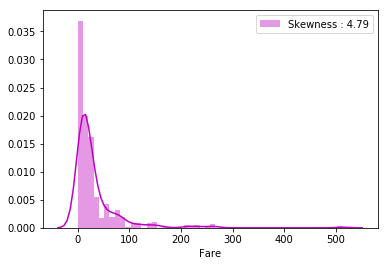

In [262]:
g = sns.distplot(data['Fare'], color='m', label='Skewness : %.2f'%(data['Fare'].skew())).legend(loc='best')

It is obvious that Fare is very skewed. This can lead to overweighting of outlier values which is unpleasant behavior. It is a good practice to scale/transform skewed data. I use the log function to reduce skewness.

In [263]:
# Log transformation of Fare
data['Fare'] = data['Fare'].transform(lambda x: np.log(x) if x > 0 else 0)

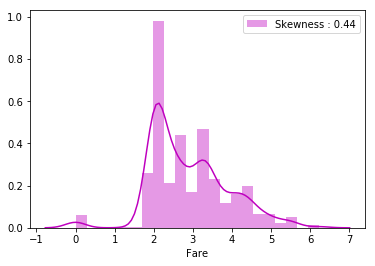

In [264]:
g = sns.distplot(data['Fare'], color='m', label='Skewness : %.2f'%(data['Fare'].skew())).legend(loc='best')

After the transofrmation, the skewness has been cleary reduced and distribution is more similar to gaussian distribution.

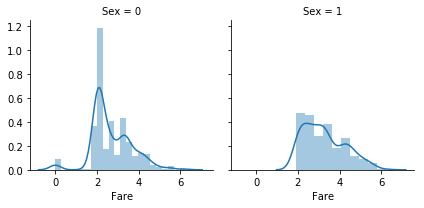

In [265]:
g = sns.FacetGrid(data, col='Sex').map(sns.distplot, "Fare")

Distribution of Fare is not identical for subpopulations of Sex. It seems that the men had paid less for the tickets given high peak in cheap Fare (around 2) than women with no such peak.
On the other hand, women's distribution is more flat with more passenger with high Fare (4 and more).
It seems that women paid more so for instance, that they wanted travel in more comfortable way thus in lower Pclass. Moreover, it seems that there were many men in low Fare category, traveling as for instance as immigrants to the U.S.

### Age

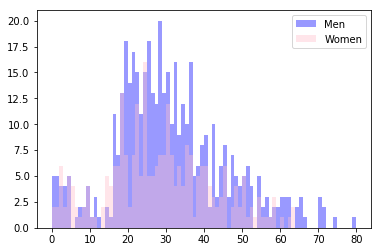

In [266]:
plt.subplot(111)
# Create plot for men
g = sns.distplot(data[data['Sex'] == 0]['Age'].dropna().values, bins=range(0, 81, 1), kde=False,color="blue", label='Men').legend(loc="best")
# Create plot for women
g = sns.distplot(data[data['Sex'] == 1]['Age'].dropna().values, bins = range(0, 81, 1), kde=False, color="pink", label='Women').legend(loc="best")

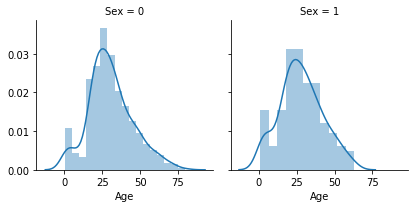

In [267]:
g = sns.FacetGrid(data, col='Sex').map(sns.distplot, 'Age')

Distributions of the two subpopulation for Age seems to be close to a Gaussian distribution with tails.
There seem to be more young men of age less than 30 and more than 65 compared to the women's distribution, but there seem to be less men in age interval 30 to 65 compared to the women's distribution.
It is, however import to keep in mind that there are 30% missing values. It may be possible that some women, especially older women, had refused to disclose their age.

### Parch

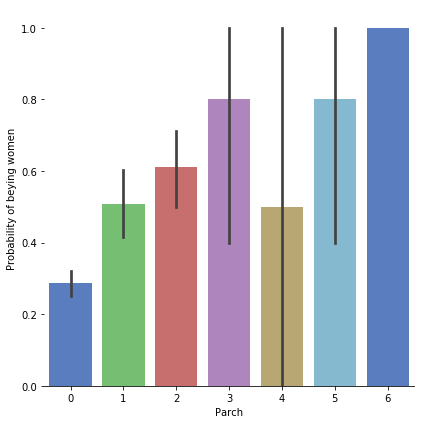

In [268]:
g = sns.factorplot(x="Parch",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

Passenger with not many children or parents on board (0-2) seems to be probably a man. Also, it seems that the probability of a passenger being a woman is growing with growing Parch. Although they are a significant standard deviation for Parch 3 to 5.

### SibSp

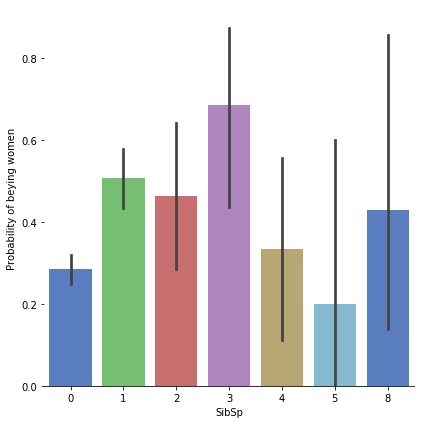

In [269]:
g = sns.factorplot(x="SibSp",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

It seems that passenger traveling with no siblings or spouses on board seems to likely a man.

### Survived

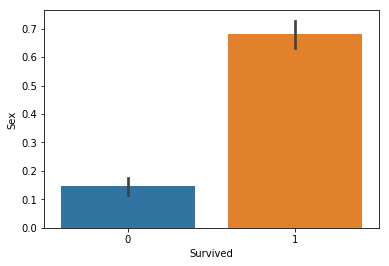

In [270]:
g = sns.barplot(x="Survived",y="Sex",data=data)

It is obvious that if the person has survived it was most probably women. This seems to be strong indicator for determing Sex. This is in line with the conveniton of "Women and children first".

### Pclass

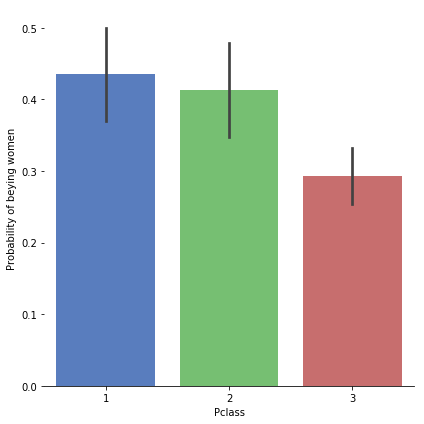

In [271]:
g = sns.factorplot(x="Pclass",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

It seems that decreasing Pclass the probability of being a women is decreasing. This is consistent with the analysis of Fare. Women were likely to travel in better class.

### Embarked

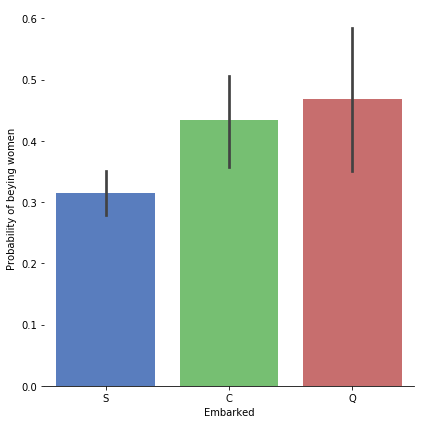

In [272]:
g = sns.factorplot(x="Embarked",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

It seems that probablity of passagner being women is the latter the passanger has embraked.

Sex         1.000000
Survived    0.543351
Pclass     -0.131900
Age        -0.093254
SibSp       0.114631
Parch       0.245489
Fare        0.264751
Name: Sex, dtype: float64

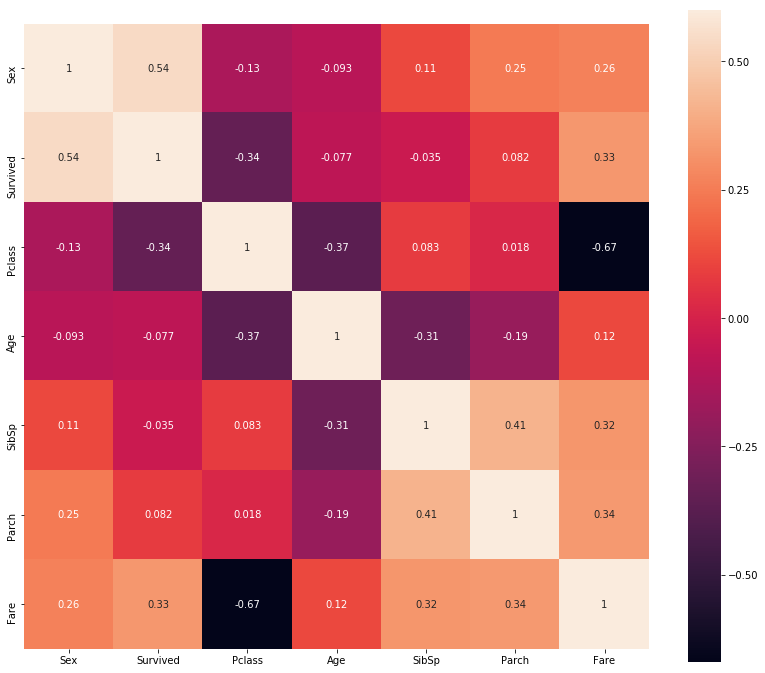

In [273]:
# Create heatmap
plt.figure(figsize=(14,12))
g = sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)
data.corr()["Sex"]

It is obvious that Survive is strongly correlated with Sex. Also Parch and Fare are somewhat correlated with Sex. There is also noticeble negative correlation between Sex and Pclass.

In [212]:
#cols = ['Sex','Survived','Pclass','Age','SibSp','Parch','Fare']
#g = sns.pairplot(data=data.dropna(), vars=cols, size=1.5,
#                 hue='Sex', palette=['blue','pink'])
#g = g.set(xticklabels=[])

## Feature engineering

In this section. I trie to create new variables that might help to predict correct Sex.

### Family size

In [213]:
# Create Family size variable
data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
# Print Family size counts
print(data["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


It seems that there were traveling many people alone.

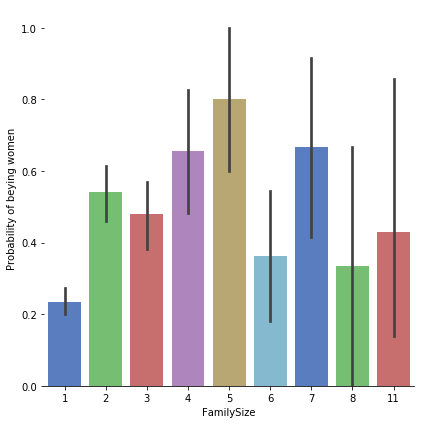

In [214]:
g = sns.factorplot(x="FamilySize",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

It seems that this new variable might have some predictive power given that small family size seems to be more common for men than women.

In [215]:
# Transform Family size in bins and create dummy variables
data['Single'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
data['Small'] = data['FamilySize'].map(lambda s: 1 if  s == 2  else 0)
data['Med'] = data['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
data['Large'] = data['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

It would also be worth try to bin the family size according to number of family members.

Deck

In [216]:
# Create Deck variable
data["Deck"]=data['Cabin'].str[0]
# Print Deck unique values
data["Deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

The first letter of the Cabin indicates the Deck. It is possible to use this additional information and create new variable. Evendough there are many missing values for this variable.

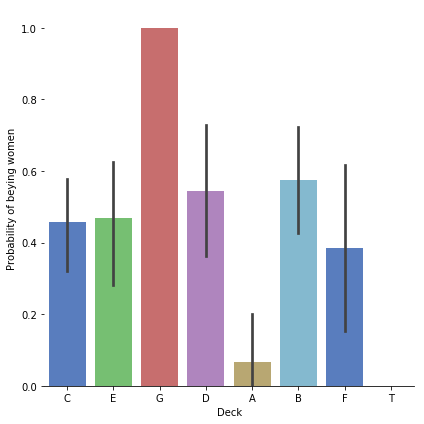

In [217]:
g = sns.factorplot(x="Deck",y="Sex",data=data,kind="bar", size = 6 , 
palette = "muted").despine(left=True).set_ylabels("Probability of beying women")

Completing features

There are only 3 values for Embarkement S, Q, C. The most simlple way would be to fill in the most common values which is S. However if we examine closely Fare and Class of passengers with missing Embarkement we see that they both paid 80 for 1. class.

In [218]:
# Print rows with missing Embarked values
data[data['Embarked'].isnull()]

,Sex,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Med,Large,Deck
61,1,1,1,38.0,0,0,113572,4.382027,B28,NaN,1,1,0,0,0,B
829,1,1,1,62.0,0,0,113572,4.382027,B28,NaN,1,1,0,0,0,B


Now, we can plot Fare and Pclass over Embarked and try to estimate port of Embarkement for the above passengers.

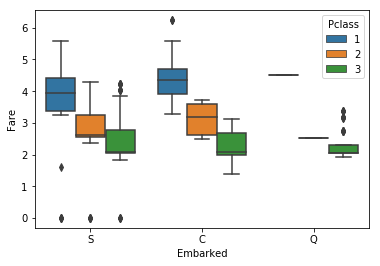

In [219]:
g = sns.boxplot(x="Embarked",y="Fare", hue="Pclass", data=data)

Majority of passengers paid 80 for 1. class in Embarkement C, so we can fill missing values with C.

In [220]:
# Fill missing Embarked values with 'C'
data["Embarked"] = data["Embarked"].fillna('C')

In [221]:
data.head()

,Sex,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Med,Large,Deck
0,0,0,3,22.0,1,0,A/5 21171,1.981001,NaN,S,2,0,1,0,0,NaN
1,1,1,1,38.0,1,0,PC 17599,4.266662,C85,C,2,0,1,0,0,C
2,1,1,3,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1,0,0,0,NaN
3,1,1,1,35.0,1,0,113803,3.972177,C123,S,2,0,1,0,0,C
4,0,0,3,35.0,0,0,373450,2.085672,NaN,S,1,1,0,0,0,NaN


There is 177 missing values for Age so it is possible to reasinobly make estimates about missing values. There are potentialy many possible ways of how to do it. Interesting one is to use some learning algorithm such Random Forest to predict missing values.

In [222]:
# Labels convertion to numeric so they can be used in function fill_missing_age
label_enco = LabelEncoder()
data['Embarked']=label_enco.fit_transform(data['Embarked'].astype(str))
data['Deck']=label_enco.fit_transform(data['Deck'].astype(str)) 

In [223]:
def fill_missing_age(df):
    """Generate missing Age values using Random Forest algorithm"""
    # Select variables to be used
    dat = df[['Age','Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck']]
    # Split df into train and test
    train  = dat.loc[(df['Age'].notnull())]
    test = dat.loc[(df['Age'].isnull()) ]
    y = train.values[:, 0]
    X = train.values[:, 1::]
    rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    pred= rfr.predict(test.values[:, 1::])
    # Fill missing Age values with predictions
    df.loc[(df['Age'].isnull()),'Age'] = pred
    return df

In [224]:
data = fill_missing_age(data)

Feature transofrmation and cleaning

In [225]:
# Drop of unnecessary columns
data = data.drop(['Ticket', 'Cabin'], axis = 1)

In [226]:
# Create dummy variables from Pclass
data["Pclass"] = data["Pclass"].astype("category")
data = pd.get_dummies(data, columns = ["Pclass"],prefix="Class")

In [227]:
# Create dummy variables from Deck
data = pd.get_dummies(data, columns = ["Deck"],prefix="Deck")

In [228]:
# Create dummy variables from Embarked
data = pd.get_dummies(data, columns = ["Embarked"], prefix="Embarked")

In [229]:
data.head()

,Sex,Survived,Age,SibSp,Parch,Fare,FamilySize,Single,Small,Med,...,Deck_2,Deck_3,Deck_4,Deck_5,Deck_6,Deck_7,Deck_8,Embarked_0,Embarked_1,Embarked_2
0,0,0,22.0,1,0,1.981001,2,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,4.266662,2,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1,26.0,0,0,2.070022,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,3.972177,2,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,35.0,0,0,2.085672,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


Modeling

I believe that there is no silver bullet algorithm,yet. So it necessary to try different kind of classifiers in order to get the best results.

In [230]:
# Set random state
random_state = 69

In [231]:
# Split data into train and test set - stratified and random pick
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], stratify=data.iloc[:,0], test_size=0.2, random_state=random_state, shuffle=True)

In [232]:
# Create 5-fold for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

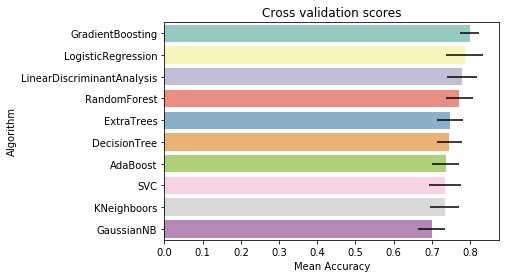

In [233]:
# Make list of classifiers
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())

# Make list of classifier's scores
cv_results = [cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1) for classifier in classifiers]
# Make list of classifiers mean scores
cv_means = [cv_result.mean() for cv_result in cv_results]
# Make list of classifiers standard deviation of scores
cv_std = [cv_result.std() for cv_result in cv_results]

# Create dataframe of classifier and metrics for plot
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting", "KNeighboors","LogisticRegression","LinearDiscriminantAnalysis", "GaussianNB"]}).sort_values(by='CrossValMeans', ascending=False)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
#ax=g

#annotate axis = seaborn axis
#for p in ax.patches:
#             ax.annotate(str(int(p.get_width())), (p.get_x() + p.get_width(), p.get_y()), xytext=(-2, 4), textcoords='offset points', horizontalalignment='right')
#g = g.set_title("Cross validation scores")

Worth trying to hyperparameter tunnig seems to be GradientBoosting, RandomForest, LogisticRegression and LDA.

In [234]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
# Search grid for best parameters
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

# Search for best parameters
gsGBC = GridSearchCV(GBC, param_grid=param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose=1)
gsGBC.fit(X_train,y_train)

# Save best parameters
GBC_best = gsGBC.best_estimator_

# Best parameters score
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   14.9s finished


0.8146067415730337

In [235]:
# Random forest classifier tunning 
RFC = RandomForestClassifier()

# Search grid for best parameters
param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

# Search for best parameters
gsRFC = GridSearchCV(RFC, param_grid=param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose=1)
gsRFC.fit(X_train,y_train)

# Save best parameters
RFC_best = gsRFC.best_estimator_

# Best parameters score
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   48.0s finished


0.8188202247191011

In [236]:
# Logistic regression tunning 
LR = LogisticRegression()


# Search grid for best parameters
param_grid = {"penalty" : ['l1', 'l2'],
                 "C":[0.001,0.01,0.1,1,10,100],
              }

# Search for best parameters
gsLR = GridSearchCV(LR,param_grid = param_grid, cv=kfold, scoring="accuracy",n_jobs=-1, verbose = 1)
gsLR.fit(X_train,y_train)

# Save best parameters
LR_best = gsLR.best_estimator_

# Best parameters score
gsLR.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished


0.7865168539325843

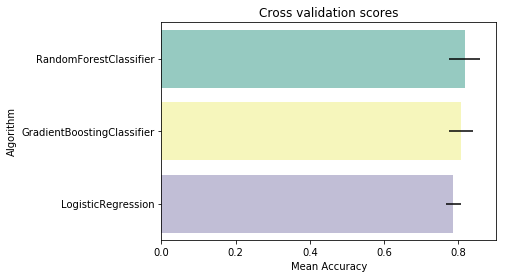

In [237]:
# List of tunned classifiers
classifiers_tunned = [LR_best,RFC_best,GBC_best]

# Make list of tunned classifier's scores
cv_results = [cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1) for classifier in classifiers_tunned]
# Make list of tunned classifiers mean scores
cv_means = [cv_result.mean() for cv_result in cv_results]
# Make list of tunned classifiers standard deviation of scores
cv_std = [cv_result.std() for cv_result in cv_results]

# Create dataframe of tunned classifier and metrics for plot
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","RandomForestClassifier","GradientBoostingClassifier"]}).sort_values(by='CrossValMeans', ascending=False)

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

Learning Cuves

In [238]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Create learnin curves for train and test set
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Create mean and standard deviation of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    # Create confidental intervals around mean of score
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    # Create plot for train
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Create plot for test
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

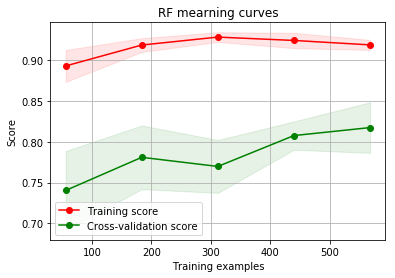

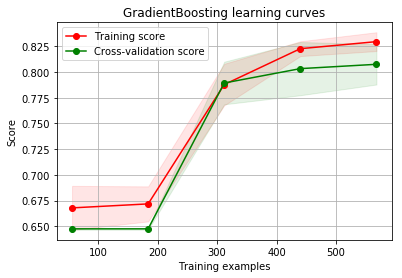

In [239]:
g = plot_learning_curve(gsRFC.best_estimator_, "RF mearning curves", X_train, y_train, cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_, "GradientBoosting learning curves", X_train, y_train, cv=kfold)

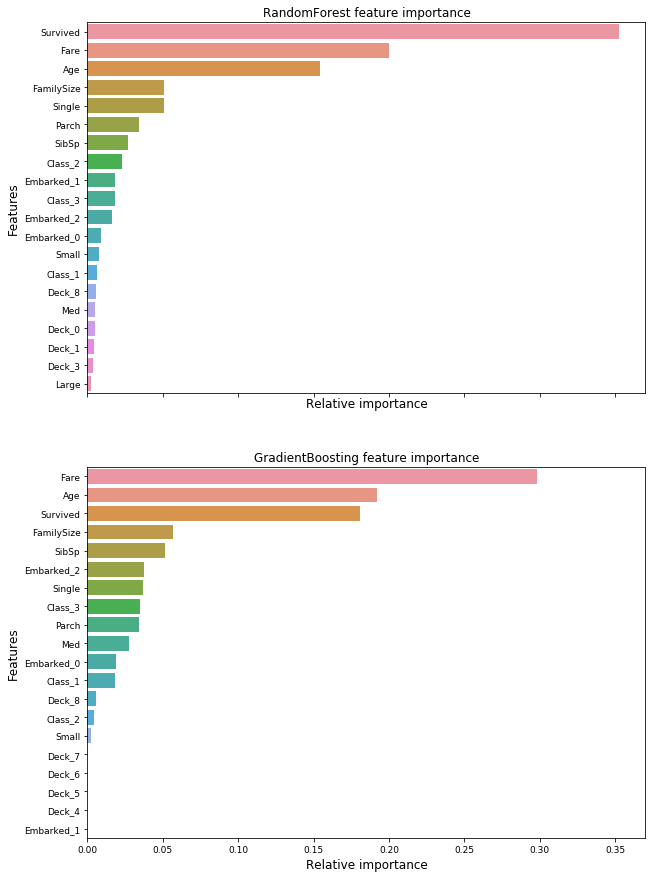

In [240]:
# Create list of tree based classifiers
names_classifiers = [("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

# Create sub plots and show 20 most imporant features
fig, ax = plt.subplots(2,1, sharex="all", figsize=(10,15))
nclassifier = 0
for row in range(2):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:20]
    g = sns.barplot(y=X_train.columns[indices][:20],
                    x = classifier.feature_importances_[indices][:20] , 
                    orient='h',
                    ax=ax[row])
    g.set_xlabel("Relative importance",fontsize=12)
    g.set_ylabel("Features",fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

In [241]:
# Set "soft" voting classifier
votingC = VotingClassifier(estimators=[('lr', LR_best),('rfc', RFC_best),
('lda',LinearDiscriminantAnalysis()),('gbc',GBC_best)], voting='soft',n_jobs=-1)

votingC = votingC.fit(X_train, y_train)

In [242]:
# Create predictions for test set using "soft" voting classifier
test_soft = pd.Series(votingC.predict(X_test))
# Print accurancy for test set
accuracy_score(y_test, test_soft)

0.84357541899441346

In [243]:
# Set "hard" voting classifier
votingC = VotingClassifier(estimators=[('lr', LR_best),('rfc', RFC_best),
('lda',LinearDiscriminantAnalysis()),('gbc',GBC_best)], voting='hard', n_jobs=-1)

votingC = votingC.fit(X_train, y_train)

In [244]:
# Create predictions for test set using "hard" voting classifier
test_hard = pd.Series(votingC.predict(X_test))
# Print accurancy for test set
accuracy_score(y_test, test_hard)

0.83240223463687146